In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Ran\Berkeley\IEOR\290\Project\Data\New Data\newData1.csv')

# 1. Data preprocessing

In [3]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Birth Year', 'Gender Flag',
       'Skillset1', 'Skillset1 Weight', 'Skillset2', 'Skillset2 Weight',
       'City of profile', 'Country of profile', 'Education',
       'Elite Institution', 'Start Date', 'End Date', 'Length', 'Role', 'Dept',
       'Location', 'Industry', 'Layoff Date', 'Company Name',
       'Employees Affected', 'laid_off', 'Age'],
      dtype='object')

In [4]:
data = data[data['Industry'] == 'Healthcare']

In [5]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [6]:
data['Birth Year'] = data[data['Birth Year'] != 'None']['Birth Year']
data['Birth Year'].unique()

D:\Anaconda\envs\data-x\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


array([1983, 1987, 1980, 1992, 1963, 1977, 1954, 1972, 1962, 1974, 2001,
       1950, 1970, 1965, 1967, 1978, 1979, 1952, 1973, 1982, 1943, 1985,
       1996, 1984, 1959, 1964, 1981, 1971, 1921, 1958, 1957, 1969, 1990,
       1968, 1988, 1975, 1961, 1955, 1989, 1994, 1956, 1966, 1986, 1948,
       1976, 1991, 1953, 1960, 1993, 1940, 1947, 1951, 1944, 1945, 1946,
       1949, 1995, 1937, 1941, 1942, 1933, 1919, 1934, 1938, 1939, 1927,
       1997, 1935, 1930], dtype=int64)

In [7]:
data = data[~data['Birth Year'].isnull()] #Drops nan
data['Age'] = 2018 - data['Birth Year'].astype('int')

In [8]:
data['Gender Flag'] = data['Gender Flag'].replace({0: 'unknown', 1: 'female', 2: 'male'})
data['Education'] = data['Education'].replace({0: 'unknown', 1: 'High School', 2: 'Vocational degree', 3: 'Associates', 
                                               4: 'Bachelors', 5:'Masters', 6: 'MBA', 7: 'PhD'})
data['Length'] = data['Length']*1/30
# Categorize length in 1:'0-6 months', 2:'6-12 months', 3:'12-18 months', 4:'18-24 months', 5:'more than 2 years'
data['Length']=pd.cut(data['Length'], bins=[0, 6, 12, 18,24,1000000], 
                                             include_lowest=True, 
                                             labels=['<6mo','6-12mo','12-18mo','12-24mo','>24mo'])

# Convert Birthyear to Age in 1:'> 45 yrs old', 2:'36-45 yrs old', 3:'26-35 yrs old', 4:'< 26 yrs old'
data['Age']=pd.cut(data['Age'], bins=[0, 25, 35, 45, 100000], 
                                             include_lowest=True, 
                                             labels=['>45 yrs old','36-45 yrs old','26-35 yrs old','<26 yrs old'])

#data['Length'] = data['Length'].astype('int')

In [9]:
data.head()

,ID,Birth Year,Gender Flag,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,City of profile,Country of profile,Education,...,Length,Role,Dept,Location,Industry,Layoff Date,Company Name,Employees Affected,laid_off,Age
493,7ace1f22-e1b7-35be-8fdf-5ff99094ae45,1983,female,Healthcare,0.403407,Manufacturing and Process Management,0.330210,Columbus,United States,Masters,...,12-18mo,"Quality Systems Engineer,systems engineer,quality",TECHNOLOGY,"menlo park, ca",Healthcare,2/18/2014,ABBOTT VASCULAR,91,0,36-45 yrs old
532,3b5df0be-f88c-3259-9232-f0bdebe64c8a,1987,unknown,Logistics,0.404213,Administration,0.290822,San Francisco,United States,Bachelors,...,<6mo,"BUYER II,buyer,2",NaN,NaN,Healthcare,12/30/2016,Thermo Fisher Scientific,2,0,36-45 yrs old
533,3b5df0be-f88c-3259-9232-f0bdebe64c8a,1987,unknown,Logistics,0.404213,Administration,0.290822,San Francisco,United States,Bachelors,...,<6mo,"BUYER II,buyer,2",NaN,NaN,Healthcare,3/31/2017,Thermo Fisher Scientific,38,0,36-45 yrs old
534,31c7d414-8e81-35df-959a-fd83697ff0d7,1980,unknown,Healthcare,0.571691,Business Development,0.288833,San Francisco,United States,Masters,...,12-24mo,"Global Strategy & Marketing,marketing","MARKETING,BUSINESS",NaN,Healthcare,2/18/2014,ABBOTT VASCULAR,91,0,26-35 yrs old
535,31c7d414-8e81-35df-959a-fd83697ff0d7,1980,unknown,Healthcare,0.571691,Business Development,0.288833,San Francisco,United States,Masters,...,>24mo,"Senior Global Strategy & Marketing,senior,"","",...","MARKETING,BUSINESS",NaN,Healthcare,2/18/2014,ABBOTT VASCULAR,91,0,26-35 yrs old


In [10]:
threshold = 5  # Remove items less than or equal to threshold
for col in data[data.columns.difference(['Age', 'Length'])]: #Cannot apply this to categorized features
    vc = data[col].value_counts()
    vals_to_remove = vc[vc <= threshold].index.values
    data[col].loc[data[col].isin(vals_to_remove)] = 0
    

D:\Anaconda\envs\data-x\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# 2. Overview of Lay off in bay area

### Different features' layoff ratio

<Figure size 432x288 with 0 Axes>

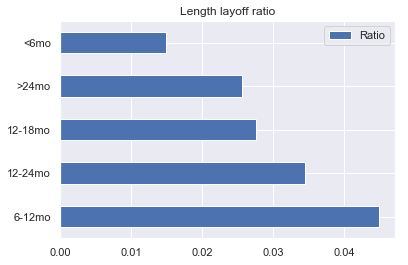

<Figure size 432x288 with 0 Axes>

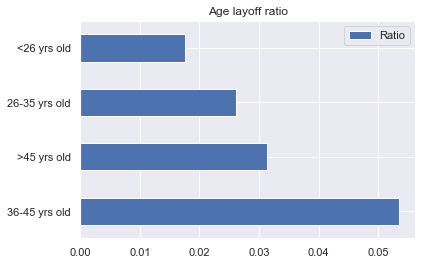

<Figure size 432x288 with 0 Axes>

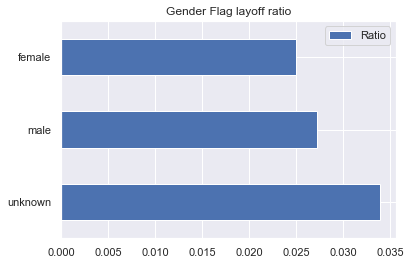

<Figure size 432x288 with 0 Axes>

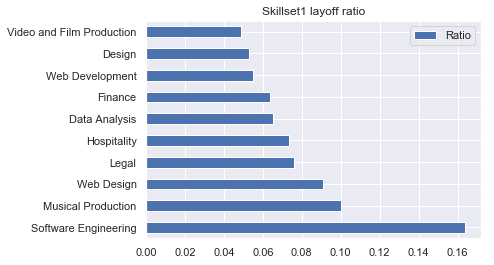

<Figure size 432x288 with 0 Axes>

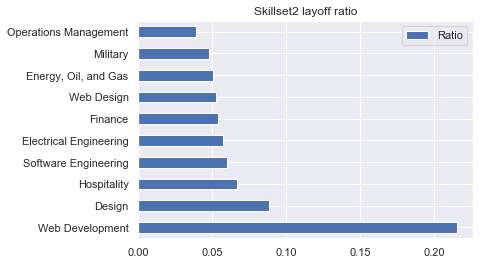

<Figure size 432x288 with 0 Axes>

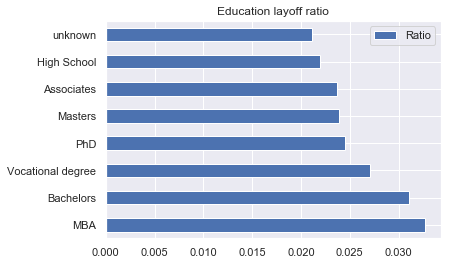

<Figure size 432x288 with 0 Axes>

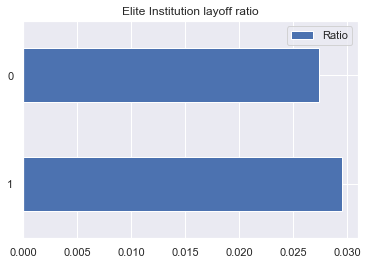

<Figure size 432x288 with 0 Axes>

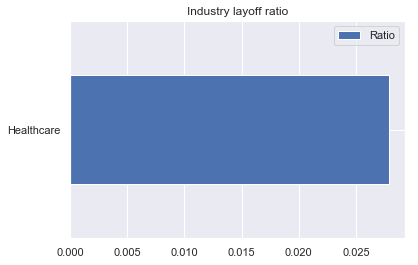

In [11]:
sns.set()
laid_off = data[data['laid_off'] == 1]

features = ['Length', 'Age', 'Gender Flag', 'Skillset1', 'Skillset2', 'Education', 'Elite Institution', 'Industry']

for feature in features:  
    laid_off_ratio = laid_off[feature].value_counts()/data[feature].value_counts()
    laid_off_ratio = pd.DataFrame(laid_off_ratio).rename(columns={feature: "Ratio"}).sort_values(by = 'Ratio', ascending = False)[:10]
    plt.figure()
    laid_off_ratio.plot.barh()
    plt.title(feature + ' layoff ratio')

### key findings:
#### - No significant observed correlation between length and ratio
#### - 36-45 yrs old most vulnerable
#### - No obvious difference in gender 
#### - Elite has slightly higher ratio
#### - Employees equipped with skillsets like Software Engneering, Web Development are most vulnerable
#### - MBA is the most vulnerable

## 3. Time Series Analysis

### 3.1 Number of layoff events

D:\Anaconda\envs\data-x\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\envs\data-x\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\data-x\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

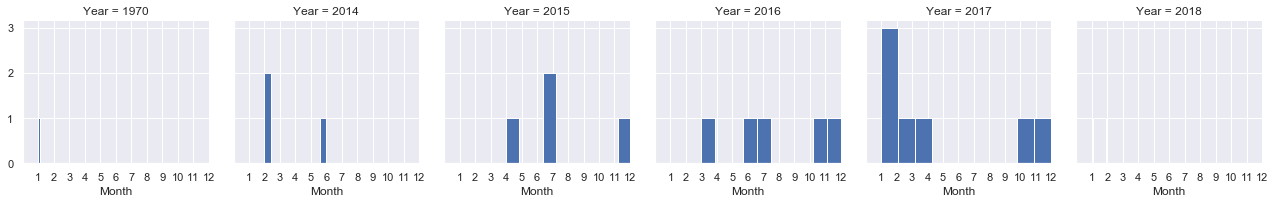

In [12]:
df = data.drop_duplicates('Layoff Date')
df['Layoff Date'] = pd.to_datetime(df['Layoff Date'],errors='coerce')
df['Year'] = df['Layoff Date'].dt.year.astype('int64')
df['Month'] = df['Layoff Date'].dt.month.astype('int64')
df['Day'] = df['Layoff Date'].dt.day.astype('int64')
df['Layoff Date'] = pd.to_datetime(df['Layoff Date']).astype('datetime64')
g = sns.FacetGrid(df, col = 'Year')
g.map(plt.hist,'Month').set(xlim=(0,12),xticks=[1,2,3,4,5,6,7,8,9,10,11,12])

### key findings:
#### - Layoff events were more common in 2014- 2017

### Layoff events scale

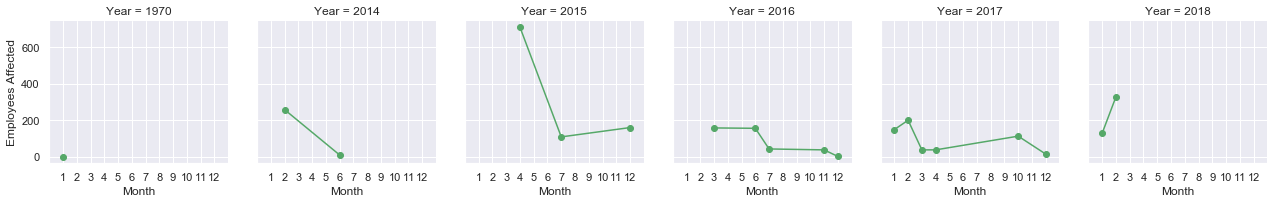

In [13]:
grouped = df.groupby(['Year','Month'])
laid_off_scale = grouped['Employees Affected'].sum()
laid_off_scale = laid_off_scale.reset_index() 
g = sns.FacetGrid(laid_off_scale, col = 'Year')
g.map(plt.plot,'Month','Employees Affected',color = 'g',marker ='o').set(xlim=(0,13),xticks=[1,2,3,4,5,6,7,8,9,10,11,12])

In [14]:
# split date
data['Layoff Date'] = pd.to_datetime(data['Layoff Date']).dt.to_period('M')
laid_off['Layoff Date'] = pd.to_datetime(laid_off['Layoff Date']).dt.to_period('M')

unique_months = data['Layoff Date'].sort_values().unique()
unique_months = unique_months[1:] #Remove 1970-01
unique_months

D:\Anaconda\envs\data-x\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<PeriodArray>
['2014-02', '2014-06', '2015-04', '2015-07', '2015-12', '2016-03', '2016-06',
 '2016-07', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
 '2017-10', '2017-12', '2018-01', '2018-02']
Length: 18, dtype: period[M]

### Skillset1

In [15]:
ratio_s1 = []#skillset1

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Skillset1'].value_counts()/\
    data[data['Layoff Date'] == month]['Skillset1'].value_counts()
    ratio = ratio.dropna()
    
    ratio_s1.append(ratio)

In [16]:
ratio_s1# list of series by month

[Administration                          0.041667
 Business Development                    0.075269
 Electrical Engineering                  0.029412
 Healthcare                              0.029248
 IT Management and Support               0.111111
 Logistics                               0.058824
 Manufacturing and Process Management    0.049180
 Software Engineering                    0.400000
 Name: Skillset1, dtype: float64,
 Administration                          0.017544
 Finance                                 0.066667
 Healthcare                              0.025078
 Human Resources                         0.018868
 Legal                                   0.111111
 Manufacturing and Process Management    0.034483
 Name: Skillset1, dtype: float64,
 Healthcare    0.166667
 Name: Skillset1, dtype: float64,
 Design                                  0.111111
 Electrical Engineering                  0.031746
 Healthcare                              0.007576
 Manufacturing and Proce

In [17]:
s1 = data['Skillset1'].value_counts()[0:9].index
ts_ratio_s1 = {}
for skill in s1:
    ts_ratio_s1[skill] = []
    
for month in range(len(ratio_s1)):
    for skill in s1:        
        if skill in ratio_s1[month].index:
            ts_ratio_s1[skill].append(ratio_s1[month][ratio_s1[month].index == skill].item())
        else:
            ts_ratio_s1[skill].append(0)

In [18]:
ts_ratio_s1

{'Healthcare': [0.02924791086350975,
  0.025078369905956112,
  0.16666666666666666,
  0.007575757575757576,
  0.012320328542094456,
  0.05555555555555555,
  0,
  0,
  0.2727272727272727,
  0.19696969696969696,
  0.020266666666666665,
  0.01303538175046555,
  0.21568627450980393,
  0.011152416356877323,
  0.0025,
  0,
  0,
  0],
 'Business Development': [0.07526881720430108,
  0,
  0,
  0,
  0.042735042735042736,
  0.10526315789473684,
  0,
  0,
  0,
  0.07142857142857142,
  0.005434782608695652,
  0,
  0.13333333333333333,
  0.019230769230769232,
  0,
  0,
  0.05555555555555555,
  0],
 'Administration': [0.041666666666666664,
  0.017543859649122806,
  0,
  0,
  0.05084745762711865,
  0.06896551724137931,
  0,
  0.75,
  0.25,
  0.18181818181818182,
  0.02181818181818182,
  0,
  0.16666666666666666,
  0.03333333333333333,
  0,
  0,
  0.06896551724137931,
  0],
 'Manufacturing and Process Management': [0.04918032786885246,
  0.034482758620689655,
  0,
  0.02830188679245283,
  0.0243902439

In [19]:
ts_ratio_s1 = pd.DataFrame.from_dict(ts_ratio_s1)
ts_ratio_s1['time'] = unique_months

In [20]:
ts_ratio_s1 = ts_ratio_s1.melt('time', var_name = 'Skillset1', value_name = 'ratio')
ts_ratio_s1.head()

,time,Skillset1,ratio
0,2014-02,Healthcare,0.029248
1,2014-06,Healthcare,0.025078
2,2015-04,Healthcare,0.166667
3,2015-07,Healthcare,0.007576
4,2015-12,Healthcare,0.012320


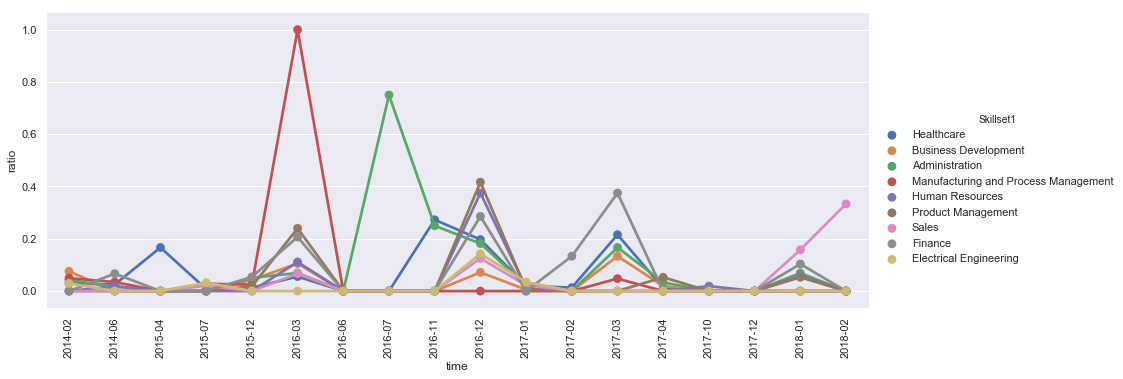

In [21]:
g = sns.catplot(x = 'time', y = 'ratio', hue = 'Skillset1', data = ts_ratio_s1, kind = 'point', aspect = 2.5)
g.set_xticklabels(rotation=90)

### Skillset2

In [22]:
ratio_s2 = []#skillset2

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Skillset2'].value_counts()/\
    data[data['Layoff Date'] == month]['Skillset2'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_s2.append(ratio)

In [23]:
s2 = data['Skillset2'].value_counts()[0:9].index
ts_ratio_s2 = {}
for skill in s2:
    ts_ratio_s2[skill] = []
    
for month in range(len(ratio_s2)):
    for skill in s2:        
        if skill in ratio_s2[month].index:
            ts_ratio_s2[skill].append(ratio_s2[month][ratio_s2[month].index == skill].item())
        else:
            ts_ratio_s2[skill].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


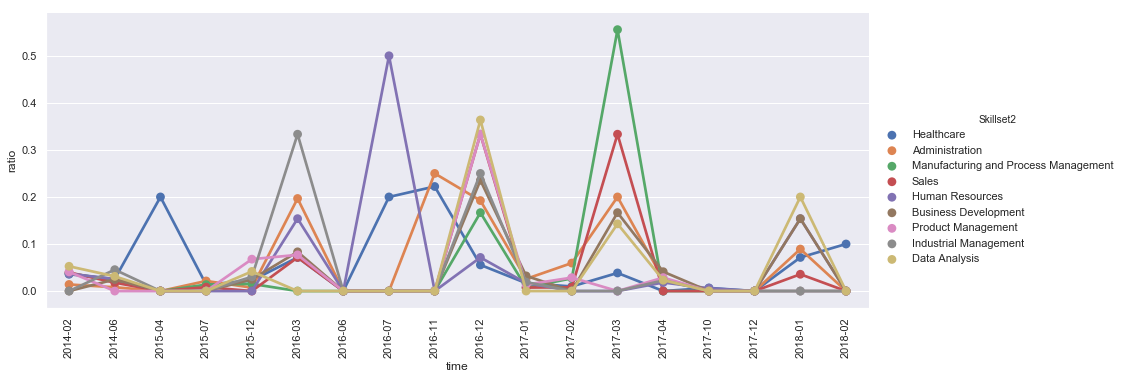

In [24]:
ts_ratio_s2 = pd.DataFrame.from_dict(ts_ratio_s2)
ts_ratio_s2['time'] = unique_months

ts_ratio_s2 = ts_ratio_s2.melt('time', var_name = 'Skillset2', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'Skillset2', data = ts_ratio_s2, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - due to the imbalance of sample size (the number of employees with sepecific skillset is very small like public policy while some skillset is much bigger), some skillsets get 100% laid off ratio

### Length of Employment

In [25]:
ratio_length = []#Length of Employment

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Length'].value_counts()/\
    data[data['Layoff Date'] == month]['Length'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_length.append(ratio)

In [26]:
lengths = data['Length'].unique()
ts_ratio_length = {}

for length in lengths:
    ts_ratio_length[length] = []
    
for month in range(len(ratio_length)):
    for length in lengths:        
        if length in ratio_length[month].index:
            ts_ratio_length[length].append(ratio_length[month][ratio_length[month].index == length].item())
        else:
            ts_ratio_length[length].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


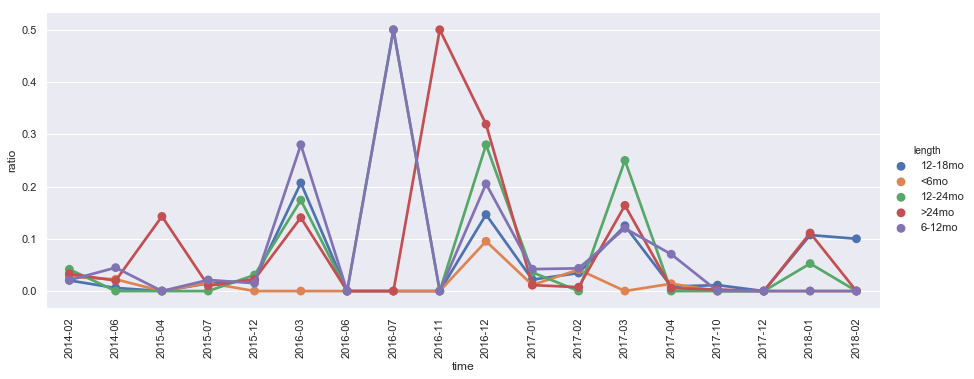

In [27]:
ts_ratio_length = pd.DataFrame.from_dict(ts_ratio_length)
ts_ratio_length['time'] = unique_months

ts_ratio_length = ts_ratio_length.melt('time', var_name = 'length', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'length', data = ts_ratio_length, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - In general, employees stayed at a company for 12-24 months

### Gender

In [28]:
ratio_gender = []#Length of Employment

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Gender Flag'].value_counts()/\
    data[data['Layoff Date'] == month]['Gender Flag'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_gender.append(ratio)

In [29]:
genders = data['Gender Flag'].unique()
ts_ratio_gender = {}

for g in genders:
    ts_ratio_gender[g] = []
    
for month in range(len(ratio_gender)):
    for g in genders:        
        if g in ratio_gender[month].index:
            ts_ratio_gender[g].append(ratio_gender[month][ratio_gender[month].index == g].item())
        else:
            ts_ratio_gender[g].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


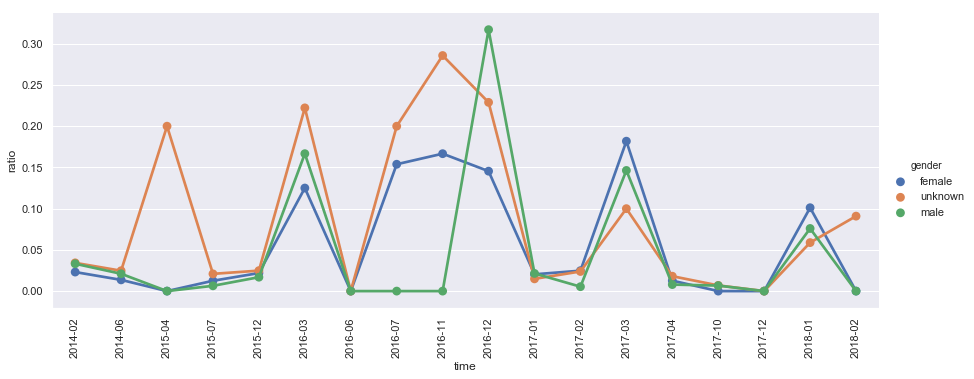

In [30]:
ts_ratio_gender = pd.DataFrame.from_dict(ts_ratio_gender)
ts_ratio_gender['time'] = unique_months

ts_ratio_gender = ts_ratio_gender.melt('time', var_name = 'gender', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'gender', data = ts_ratio_gender, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - No significant difference from males & females

### Age

In [31]:
ratio_age = []

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Age'].value_counts()/\
    data[data['Layoff Date'] == month]['Age'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_age.append(ratio)

In [32]:
age = data['Age'].unique()
ts_ratio_age = {}

for a in age:
    ts_ratio_age[a] = []
    
for month in range(len(ratio_age)):
    for a in age:        
        if a in ratio_age[month].index:
            ts_ratio_age[a].append(ratio_age[month][ratio_age[month].index == a].item())
        else:
            ts_ratio_age[a].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


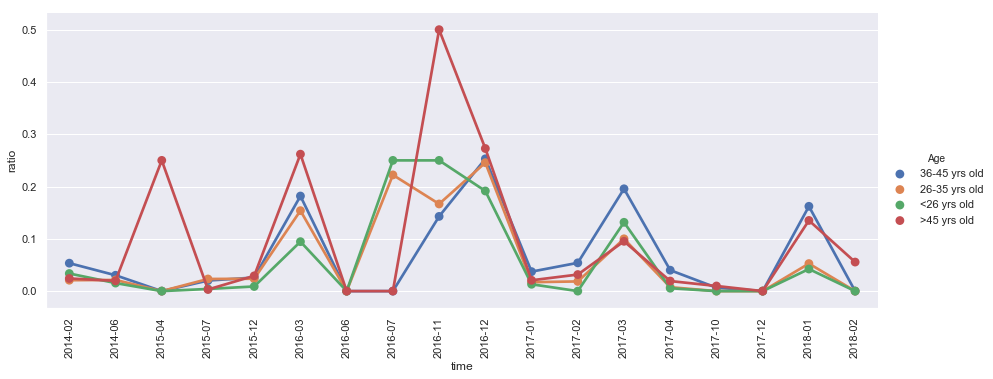

In [33]:
ts_ratio_age = pd.DataFrame.from_dict(ts_ratio_age)
ts_ratio_age['time'] = unique_months

ts_ratio_age = ts_ratio_age.melt('time', var_name = 'Age', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'Age', data = ts_ratio_age, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - In general, 36-45 years old employees are most vulnerable while those <26 years old are least vulnerable

### Elite instituion

In [34]:
ratio_elite = []

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Elite Institution'].value_counts()/\
    data[data['Layoff Date'] == month]['Elite Institution'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_elite.append(ratio)

In [35]:
elite = data['Elite Institution'].unique()
ts_ratio_elite = {}

for a in elite:
    ts_ratio_elite[a] = []
    
for month in range(len(ratio_elite)):
    for a in elite:        
        if a in ratio_elite[month].index:
            ts_ratio_elite[a].append(ratio_elite[month][ratio_elite[month].index == a].item())
        else:
            ts_ratio_elite[a].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


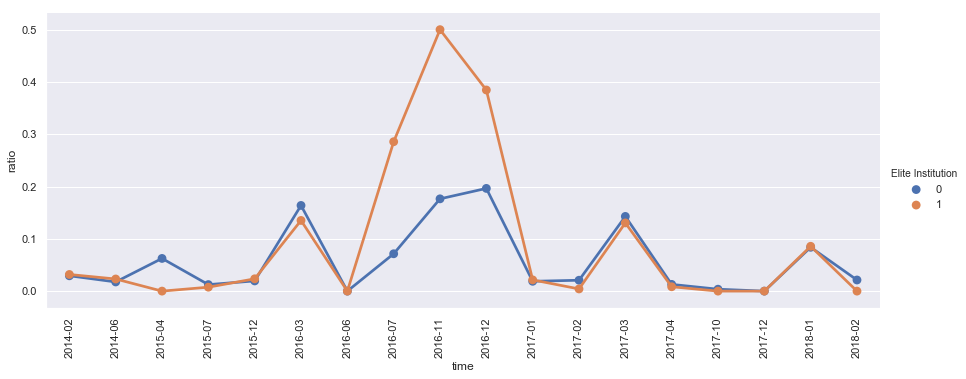

In [36]:
ts_ratio_elite = pd.DataFrame.from_dict(ts_ratio_elite)
ts_ratio_elite['time'] = unique_months

ts_ratio_elite = ts_ratio_elite.melt('time', var_name = 'Elite Institution', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'Elite Institution', data = ts_ratio_elite, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - Elite institution seems more  vulnerable 

### Education

In [37]:
ratio_edu = []

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Education'].value_counts()/\
    data[data['Layoff Date'] == month]['Education'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_edu.append(ratio)

In [38]:
edu = data['Education'].unique()
ts_ratio_edu = {}

for a in edu:
    ts_ratio_edu[a] = []
    
for month in range(len(ratio_edu)):
    for a in edu:        
        if a in ratio_edu[month].index:
            ts_ratio_edu[a].append(ratio_edu[month][ratio_edu[month].index == a].item())
        else:
            ts_ratio_edu[a].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


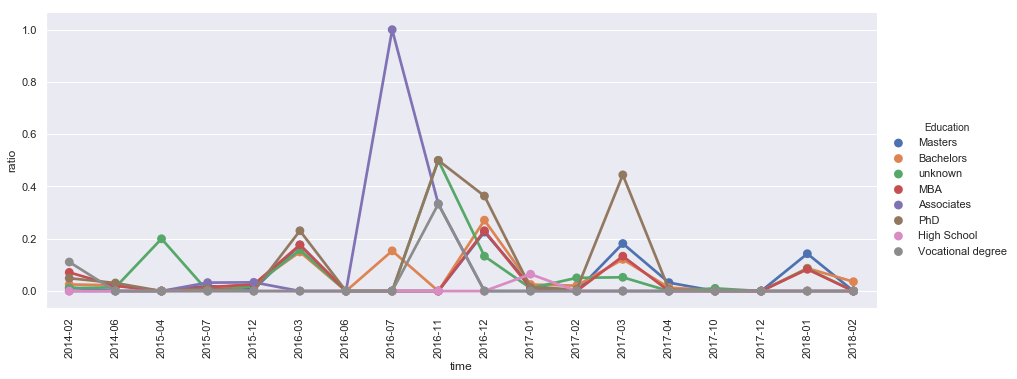

In [39]:
ts_ratio_edu= pd.DataFrame.from_dict(ts_ratio_edu)
ts_ratio_edu['time'] = unique_months

ts_ratio_edu = ts_ratio_edu.melt('time', var_name = 'Education', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'Education', data = ts_ratio_edu, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - High layoff ratios in the 2nd half of 2016

### Industry

In [40]:
ratio_indus = []

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Industry'].value_counts()/\
    data[data['Layoff Date'] == month]['Industry'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_indus.append(ratio)

In [41]:
indus = data['Industry'].unique()
ts_ratio_indus = {}

for a in indus:
    ts_ratio_indus[a] = []
    
for month in range(len(ratio_indus)):
    for a in indus:        
        if a in ratio_indus[month].index:
            ts_ratio_indus[a].append(ratio_indus[month][ratio_indus[month].index == a].item())
        else:
            ts_ratio_indus[a].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


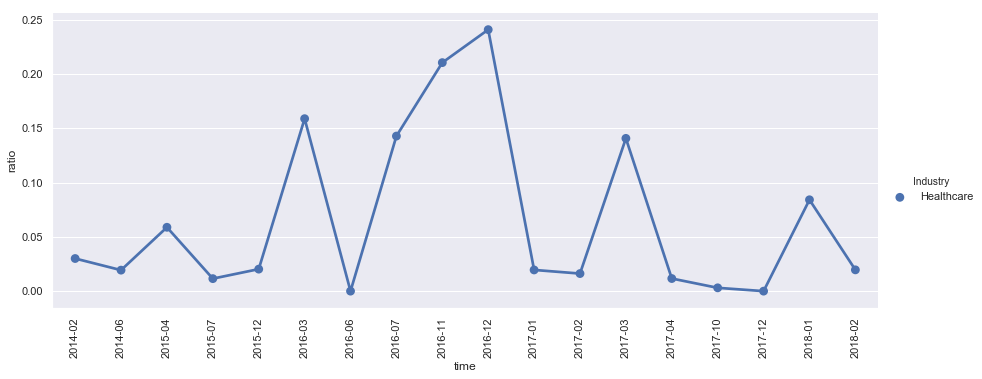

In [42]:
ts_ratio_indus= pd.DataFrame.from_dict(ts_ratio_indus)
ts_ratio_indus['time'] = unique_months

ts_ratio_indus = ts_ratio_indus.melt('time', var_name = 'Industry', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'Industry', data = ts_ratio_indus, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - Layoff rate peaks at end of 2016